## 0.a. Importing OpenCV and Numpy
Code available here is based on OpenCV documentation:
 - GrabCut: https://docs.opencv.org/trunk/d8/d83/tutorial_py_grabcut.html


In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from timeit import default_timer as timer

## 0.b. Importing assets

In [12]:
img = cv2.cvtColor(cv2.imread("doggo.jpg"), cv2.COLOR_BGR2RGB)
img_mask = cv2.imread("doggo_mask.jpg")

# converts mask to gray8
img_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)

## 1. First option - Using GrabCut 

### Defining crop rect and mask 

In [23]:
# creates a binary mask where 0 is surely background and 1 is surely foreground
mask = np.zeros(img.shape[:2], 'uint8')
mask[img_mask > 15] = 2  # makes sure that places marked with gray (or closer) are tagged as probably background
mask[img_mask >= 240] = 1  # makes sure that places marked with white (or closer) are tagged as foreground

mask.shape

(1195, 2124)

### Showing mask

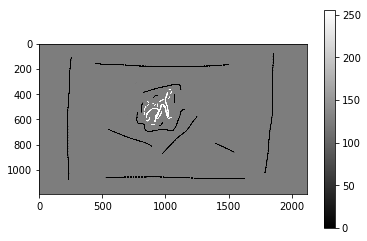

(<matplotlib.image.AxesImage at 0x7f6b968a2470>,
 None)

In [24]:
plt.imshow(img_mask, cmap='gray'), plt.colorbar(), plt.show()

Showing what mask means

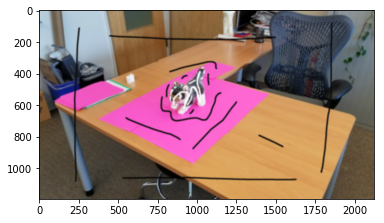

(<matplotlib.image.AxesImage at 0x7f6b96875a20>, None)

In [25]:
img_mask_explanation = cv2.cvtColor(cv2.imread("doggo_mask_explanation.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img_mask_explanation, interpolation = 'bicubic'), plt.show()

### Applying filter

In [26]:
# creating the two arrays that the algorithm uses internally
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# applying algorithm. Arguments are the following:
# img - input image
# mask - mask image where we specify background (0 or cv2.GC_BGD), foreground (1), probable background(2), probable foreground(3)
# rect - selects region of interest (area that has the foreground). Format (x, y, w, h). Needs flag cv2.GC_INIT_WITH_RECT
# bdgModel, fdgModel - internally used
# iterCount - number of iterations the algorithm should run (5 in this case)
# mode - cv2.GC_INIT_WITH_RECT or cv2.GC_INIT_WITH_MASK or both combined. We are starting with a mask (and no rect); thus cv2.GC_INIT_WITH_MASK
ts = timer()
mask, bgdModel, fgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
newImg = img*mask[:, :, np.newaxis]
te = timer()
print("Operation took: %f seconds" % (te - ts))

Operation took: 16.247246 seconds


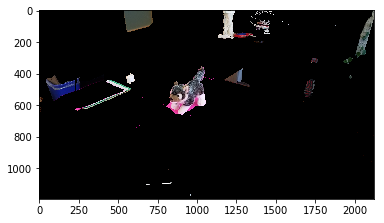

(<matplotlib.image.AxesImage at 0x7f6b9682da58>, None)

In [27]:
plt.imshow(newImg),plt.show()

For some reason, this did not yield the expected results and took me a couple of iterations. Moving on to a more streamlined (and simple) algorithm